<a href="https://colab.research.google.com/github/ertgrulyksk/Nonlinear_Regression_Models/blob/main/Nonlinear_Regression_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [55]:
from warnings import filterwarnings
filterwarnings("ignore")

In [56]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")
X = pd.concat([X_, dms[["League_N","Division_W","NewLeague_N"]]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [57]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1


In [58]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [59]:
knn_model

KNeighborsRegressor()

In [60]:
knn_model.n_neighbors

5

In [61]:
knn_model.metric

'minkowski'

In [62]:
dir(knn_model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_algorithm_metric',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tree',
 '_validate_data',
 '_y',
 'algorithm',
 'effective_metric_',
 'effective_metric_params_',
 'feature_names_in_',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'leaf_size',
 'metric',
 'metric_params',
 'n_features_in_',
 'n_jobs',
 'n_neighbors',
 'n_s

In [63]:
knn_model.predict(X_test)[0:5]

array([ 510.3334,  808.3334,  772.5   ,  125.5   , 1005.    ])

In [64]:
y_pred = knn_model.predict(X_test)

In [65]:
np.sqrt(mean_squared_error(y_test, y_pred))

426.6570764525201

In [66]:
RMSE = []

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    RMSE.append(rmse)
    print("k=", k, " için RMSE değeri ", rmse)

k= 1  için RMSE değeri  455.03925390751965
k= 2  için RMSE değeri  415.99629571490965
k= 3  için RMSE değeri  420.6765370082348
k= 4  için RMSE değeri  428.8564674588792
k= 5  için RMSE değeri  426.6570764525201
k= 6  için RMSE değeri  423.5071669008732
k= 7  için RMSE değeri  414.9361222421057
k= 8  için RMSE değeri  413.7094731463598
k= 9  için RMSE değeri  417.84419990871265
k= 10  için RMSE değeri  421.6252180741266


In [67]:
knn_params = {"n_neighbors": np.arange(1,30,1)}

In [68]:
knn = KNeighborsRegressor()

In [69]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10).fit(X_train, y_train)

In [70]:
knn_cv_model.best_params_

{'n_neighbors': 8}

In [71]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"]).fit(X_train, y_train)

In [72]:
y_pred = knn_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

413.7094731463598

In [75]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [78]:
scaler = StandardScaler()

In [85]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [86]:
X_test_scaled = scaler.transform(X_test)

In [87]:
mlp_model = MLPRegressor().fit(X_train_scaled, y_train)

In [88]:
mlp_model

MLPRegressor()

In [89]:
mlp_model.predict(X_test_scaled)[0:5]

array([18.59495616, 44.11413027, 69.87088809, 13.85257735, 16.90131657])

In [90]:
y_pred = mlp_model.predict(X_test_scaled)

In [91]:
np.sqrt(mean_squared_error(y_test, y_pred))

659.7870418176494

In [93]:
mlp_params = {"alpha" : [0.1,0.01,0.02,0.001,0.0001],
              "hidden_layer_sizes" : [(10,20),(5,5),(100,100)]}

In [94]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 5, verbose = 2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


In [95]:
mlp_cv_model.best_params_

{'alpha': 0.02, 'hidden_layer_sizes': (100, 100)}

In [97]:
mlp_tuned = MLPRegressor(alpha = 0.02, hidden_layer_sizes = (100,100)).fit(X_train_scaled, y_train)

In [98]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [99]:
np.sqrt(mean_squared_error(y_test, y_pred))

359.00365631145877

In [100]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [101]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [103]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 3)

In [104]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=3)

In [105]:
cart_model.predict(X_test)[0:5]

array([813.0988    , 813.0988    , 813.0988    , 345.20115517,
       345.20115517])

In [106]:
y_pred = cart_model.predict(X_test)

In [107]:
np.sqrt(mean_squared_error(y_test,y_pred))

460.0663148428844

In [108]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [109]:
cart_model = DecisionTreeRegressor().fit(X_train, y_train)

In [111]:
y_pred = cart_model.predict(X_test)

In [112]:
np.sqrt(mean_squared_error(y_test, y_pred))

434.13528485566815

In [113]:
cart_model

DecisionTreeRegressor()

In [114]:
cart_model = DecisionTreeRegressor(max_depth=3).fit(X_train,y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

391.5530522634767

In [115]:
cart_params = {"max_depth":[1,3,4,5,10,20], "min_samples_split":[2,10,5,30,50,100]}

In [116]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10).fit(X_train, y_train)

In [117]:
cart_cv_model.best_params_

{'max_depth': 4, 'min_samples_split': 50}

In [118]:
cart_tuned = DecisionTreeRegressor(max_depth = 4, min_samples_split = 50).fit(X_train, y_train)

In [119]:
y_pred = cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

361.0876906511434

In [120]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [123]:
rf_model = RandomForestRegressor(random_state = 42).fit(X_train, y_train)

In [124]:
rf_model

RandomForestRegressor(random_state=42)

In [125]:
y_pred = rf_model.predict(X_test)

In [126]:
np.sqrt(mean_squared_error(y_test, y_pred))

344.8191624908484

In [127]:
rf_params = {"max_depth": [5,8],
             "max_features": [2,5],
             "n_estimators": [200,500,1000],
             "min_samples_split": [2,10,80]}

In [128]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10,n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


In [129]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [130]:
rf_modle = RandomForestRegressor(random_state = 42,
                                max_depth = 8,
                                max_features = 2,
                                min_samples_split = 2,
                                n_estimators = 200)
rf_tuned = rf_model.fit(X_train, y_train)

In [131]:
y_pred = rf_tuned.predict(X_test)

In [132]:
np.sqrt(mean_squared_error(y_test, y_pred))

344.8191624908484

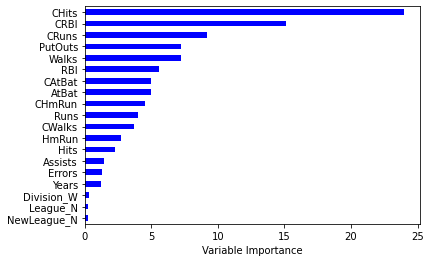

In [135]:
Importance = pd.DataFrame({'Importance': rf_tuned.feature_importances_*100},
                          index = X_train.columns)

Importance.sort_values(by = 'Importance',
                       axis = 0,
                       ascending = True).plot(kind = 'barh',
                                                color = 'b',)
                       
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [136]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [137]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [138]:
gbm_model

GradientBoostingRegressor()

In [140]:
y_pred = gbm_model.predict(X_test)

In [141]:
np.sqrt(mean_squared_error(y_test, y_pred))

347.45457816204316

In [142]:
gbm_params ={"learning_rate": [0.1,0.01],
             "max_depth": [3,5],
             "n_estimators": [200,500],
             "subsample": [1,0.5,0.8]}

In [143]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [144]:
gbm_cv_model = GridSearchCV(gbm_model, gbm_params, cv = 10,
                            n_jobs = 1, verbose = 2).fit(X_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1; total time=   0.2s
[CV] END learning_rate=0.1,

In [148]:
gbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.5}

In [149]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.01,
                                      max_depth = 5,
                                      n_estimators = 500,
                                      subsample = 0.5,
                                      loss = "lad").fit(X_train, y_train)

In [150]:
y_pred = gbm_tuned.predict(X_test)

In [151]:
np.sqrt(mean_squared_error(y_test, y_pred))

318.5144428644796

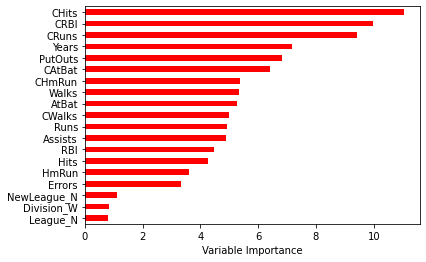

In [153]:
Importance = pd.DataFrame({'Importance': gbm_tuned.feature_importances_*100},
                          index = X_train.columns)

Importance.sort_values(by = 'Importance', 
                       axis = 0,
                       ascending = True).plot(kind = 'barh',
                                                color = 'r')
                       
plt.xlabel('Variable Importance')
plt.gca().legend_=None

In [154]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [155]:
!pipt install xgboost

/bin/bash: pipt: command not found


In [156]:
import xgboost
from xgboost import XGBRegressor

In [157]:
xgb = XGBRegressor().fit(X_train, y_train)

[18:15:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [158]:
xgb

XGBRegressor()

In [159]:
y_pred = xgb.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

359.91750599447033

In [160]:
xgb_params = {"learning_rate": [0.1,0.01,0.5],
             "max_depth": [2,3,4,5,8],
             "n_estimators": [100,200,500],
             "subsample": [0.4,0.7]}

In [161]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 90 candidates, totalling 900 fits
[18:19:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [162]:
xgb_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500, 'subsample': 0.7}

In [165]:
xgb_tuned = XGBRegressor(colsample_bylevel = 0.7,
                        learning_rate = 0.1,
                         max_depth = 2,
                         n_estimators = 500).fit(X_train, y_train)

[18:21:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [166]:
y_pred =xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

333.4542345754869

In [167]:
 df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [168]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [170]:
from lightgbm import LGBMRegressor

In [171]:
lgb_model = LGBMRegressor().fit(X_train, y_train)

In [172]:
lgb_model

LGBMRegressor()

In [173]:
y_pred = lgb_model.predict(X_test)

In [174]:
np.sqrt(mean_squared_error(y_test, y_pred))

363.8712087611089

In [175]:
lgbm_params = {"learning_rate": [0.01,0.1,0.5,1],
               "n_estimators": [40,100,1000],
               "max_depth": [1,2,3]}

In [176]:
lgbm_cv_model = GridSearchCV(lgb_model,lgbm_params,cv = 10,n_jobs =-1,
                            verbose = 2).fit(X_train,y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


In [177]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 40}

In [178]:
lgb_tuned = LGBMRegressor(learning_rate=0.1,
                         max_depth=3,
                         n_estimators=40).fit(X_train,y_train)

In [179]:
y_pred = lgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

364.7698635536198

In [180]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [181]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 18 kB/s 


In [182]:
from catboost import CatBoostRegressor

In [183]:
catb_model = CatBoostRegressor().fit(X_train,y_train)

Learning rate set to 0.031674
0:	learn: 437.6430699	total: 58.5ms	remaining: 58.5s
1:	learn: 431.3923642	total: 61.7ms	remaining: 30.8s
2:	learn: 424.8820360	total: 65.9ms	remaining: 21.9s
3:	learn: 418.2514904	total: 74.6ms	remaining: 18.6s
4:	learn: 412.6394021	total: 77.2ms	remaining: 15.4s
5:	learn: 406.6247020	total: 81.5ms	remaining: 13.5s
6:	learn: 400.5321206	total: 90ms	remaining: 12.8s
7:	learn: 394.6683437	total: 97.7ms	remaining: 12.1s
8:	learn: 388.2496484	total: 108ms	remaining: 11.9s
9:	learn: 382.9448842	total: 110ms	remaining: 10.9s
10:	learn: 377.2600080	total: 117ms	remaining: 10.5s
11:	learn: 372.4829606	total: 121ms	remaining: 9.96s
12:	learn: 366.6823437	total: 124ms	remaining: 9.45s
13:	learn: 362.6076230	total: 129ms	remaining: 9.06s
14:	learn: 358.0107745	total: 133ms	remaining: 8.75s
15:	learn: 353.2802665	total: 144ms	remaining: 8.86s
16:	learn: 348.5646265	total: 149ms	remaining: 8.59s
17:	learn: 343.6407912	total: 166ms	remaining: 9.08s
18:	learn: 339.23638

In [184]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

351.194631344607

In [185]:
catb_params = {"iterations":[200,500,100],
              "learning_rate":[0.01,0.1],
              "depth":[3,6,8]}

In [186]:
catb_model = CatBoostRegressor()

In [187]:
catb_cv_model = GridSearchCV(catb_model,
                          catb_params,
                          cv=5,
                          n_jobs=-1,
                          verbose = 2).fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
0:	learn: 425.7900818	total: 778us	remaining: 155ms
1:	learn: 404.8723520	total: 1.44ms	remaining: 143ms
2:	learn: 387.4057666	total: 2.23ms	remaining: 147ms
3:	learn: 372.2801584	total: 3.33ms	remaining: 163ms
4:	learn: 358.9204229	total: 4.41ms	remaining: 172ms
5:	learn: 347.0083933	total: 5.53ms	remaining: 179ms
6:	learn: 336.0130818	total: 6.65ms	remaining: 183ms
7:	learn: 324.3923300	total: 8.13ms	remaining: 195ms
8:	learn: 314.8690957	total: 9.15ms	remaining: 194ms
9:	learn: 308.5075563	total: 10.1ms	remaining: 193ms
10:	learn: 298.8587285	total: 11.5ms	remaining: 198ms
11:	learn: 294.7655438	total: 12.5ms	remaining: 195ms
12:	learn: 288.0697862	total: 13.5ms	remaining: 194ms
13:	learn: 282.6697154	total: 14.6ms	remaining: 193ms
14:	learn: 277.6121667	total: 15.5ms	remaining: 192ms
15:	learn: 273.4383979	total: 16.6ms	remaining: 190ms
16:	learn: 269.1556201	total: 17.7ms	remaining: 191ms
17:	learn: 264.8098704	total: 18

In [188]:
catb_cv_model.best_params_

{'depth': 3, 'iterations': 200, 'learning_rate': 0.1}

In [189]:
catb_tuned = CatBoostRegressor(depth=3,
                              iterations=200,
                              learning_rate=0.1).fit(X_train,y_train)

0:	learn: 425.7900818	total: 940us	remaining: 187ms
1:	learn: 404.8723520	total: 9.33ms	remaining: 924ms
2:	learn: 387.4057666	total: 10.5ms	remaining: 689ms
3:	learn: 372.2801584	total: 11.6ms	remaining: 566ms
4:	learn: 358.9204229	total: 12.6ms	remaining: 490ms
5:	learn: 347.0083933	total: 13.5ms	remaining: 438ms
6:	learn: 336.0130818	total: 14.5ms	remaining: 400ms
7:	learn: 324.3923300	total: 15.4ms	remaining: 371ms
8:	learn: 314.8690957	total: 16.4ms	remaining: 347ms
9:	learn: 308.5075563	total: 17.3ms	remaining: 329ms
10:	learn: 298.8587285	total: 18.2ms	remaining: 313ms
11:	learn: 294.7655438	total: 19.1ms	remaining: 300ms
12:	learn: 288.0697862	total: 20.1ms	remaining: 289ms
13:	learn: 282.6697154	total: 21.2ms	remaining: 282ms
14:	learn: 277.6121667	total: 22.3ms	remaining: 275ms
15:	learn: 273.4383979	total: 23.4ms	remaining: 269ms
16:	learn: 269.1556201	total: 24.7ms	remaining: 265ms
17:	learn: 264.8098704	total: 25.8ms	remaining: 260ms
18:	learn: 261.6700768	total: 26.7ms	re

In [190]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

344.3125832615482

In [191]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])

In [192]:
def compML(df, y, alg):
    
    y = df[y]
    X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
    X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
    
    # Modelleme
    model = alg().fit(X_train,y_train)
    y_pred = model.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
    model_ismi = alg.__name__
    print(model_ismi,'Modeli Test Hatası:', RMSE)
    return RMSE

In [193]:
compML(df, "Salary", SVR)

SVR Modeli Test Hatası: 460.0032657244849


460.0032657244849

In [194]:
models = [LGBMRegressor,
          XGBRegressor,
          GradientBoostingRegressor,
          RandomForestRegressor,
          DecisionTreeRegressor,
          MLPRegressor,
          KNeighborsRegressor,
          SVR]

In [195]:
for i in models:
    compML(df, "Salary",i)

LGBMRegressor Modeli Test Hatası: 363.8712087611089
[18:38:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor Modeli Test Hatası: 359.91750599447033
GradientBoostingRegressor Modeli Test Hatası: 346.074148692425
RandomForestRegressor Modeli Test Hatası: 336.58403023359773
DecisionTreeRegressor Modeli Test Hatası: 537.6606852329794
MLPRegressor Modeli Test Hatası: 369.6355416060131
KNeighborsRegressor Modeli Test Hatası: 426.6570764525201
SVR Modeli Test Hatası: 460.0032657244849
